In [33]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [43]:
# 결측치 처리

# 1. Pregnancy: 임신 경험 횟수 → NaN은 0으로 (남성 혹은 무경험 추정)
df['Pregnancy'] = df['Pregnancy'].fillna(0)

# 2. alcohol_consumption_per_day: 하루 음주량 → NaN은 평균으로 대체 (무응답일 수 있으므로)
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(
    df['alcohol_consumption_per_day'].mean()
)

# 3. Genetic_Pedigree_Coefficient: 유전 계수 → NaN은 평균으로 대체 (중립적 수치)
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(
    df['Genetic_Pedigree_Coefficient'].mean()
)

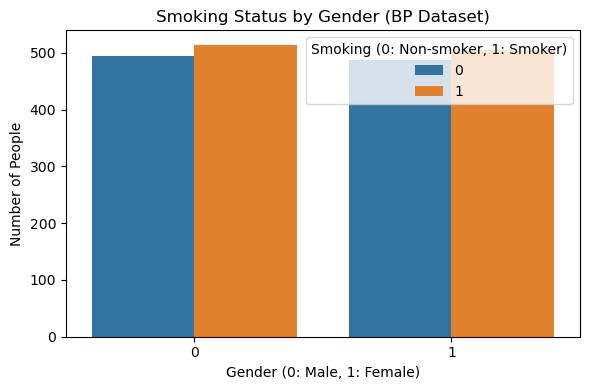

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Smoking', data=df)
plt.title("Smoking Status by Gender (BP Dataset)")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Number of People")
plt.legend(title="Smoking (0: Non-smoker, 1: Smoker)")
plt.tight_layout()
plt.show()

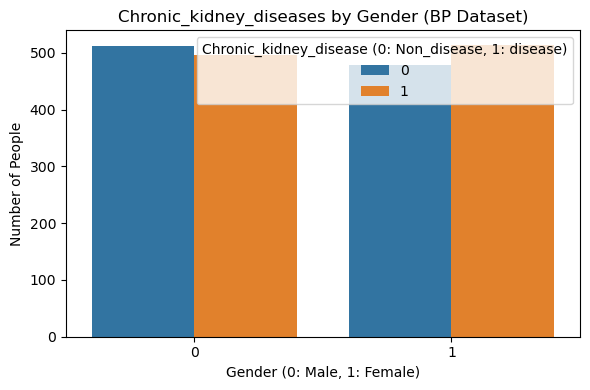

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Chronic_kidney_disease', data=df)
plt.title("Chronic_kidney_diseases by Gender (BP Dataset)")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Number of People")
plt.legend(title="Chronic_kidney_disease (0: Non_disease, 1: disease)")
plt.tight_layout()
plt.show()

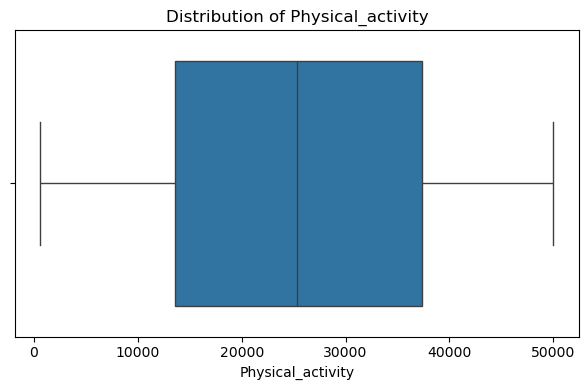

In [82]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Physical_activity'])
plt.title("Distribution of Physical_activity")
plt.xlabel("Physical_activity")
plt.tight_layout()
plt.show()

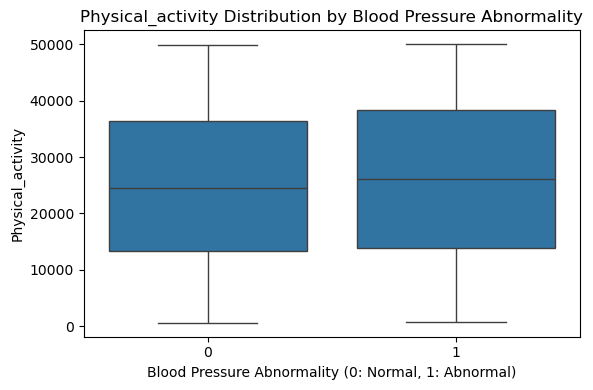

In [86]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=df)
plt.title("Physical_activity Distribution by Blood Pressure Abnormality")
plt.xlabel("Blood Pressure Abnormality (0: Normal, 1: Abnormal)")
plt.ylabel("Physical_activity")
plt.tight_layout()
plt.show()

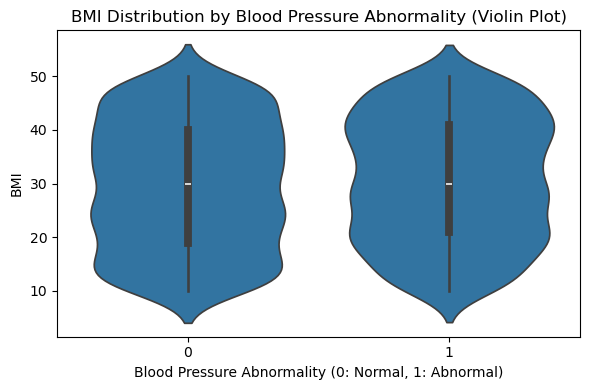

In [88]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Blood_Pressure_Abnormality', y='BMI', data=df)
plt.title("BMI Distribution by Blood Pressure Abnormality (Violin Plot)")
plt.xlabel("Blood Pressure Abnormality (0: Normal, 1: Abnormal)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

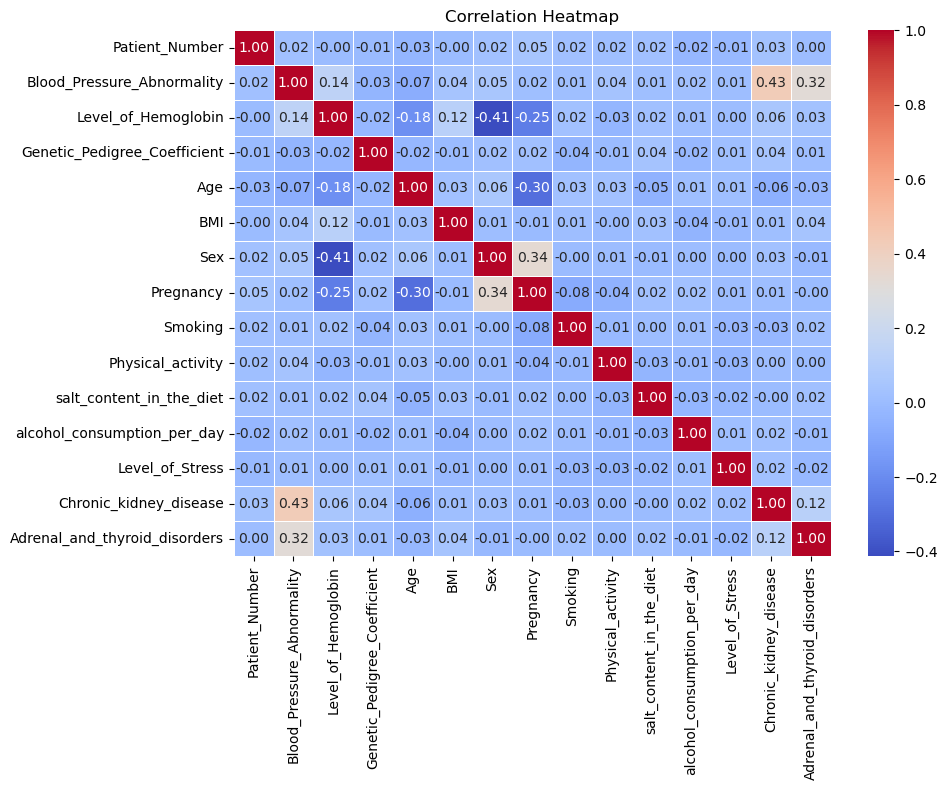

In [90]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)  # 수치형 컬럼 간의 상관계수 계산
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 히트맵 결과 가족력과 갑상선 장애가 고혈압과 관련이 있다는 것을 알 수 있음

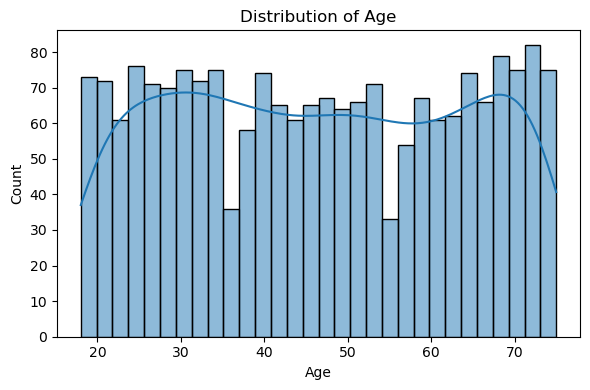

In [93]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

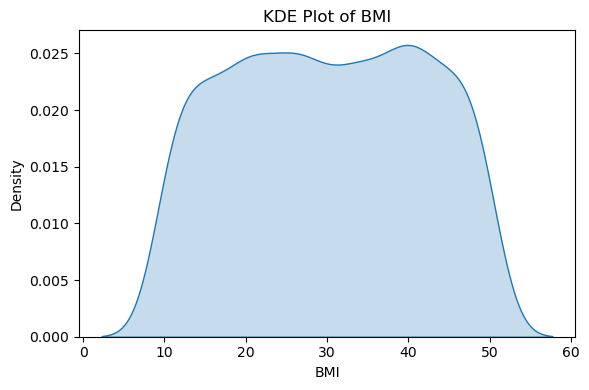

In [97]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='BMI', fill=True)
plt.title("KDE Plot of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

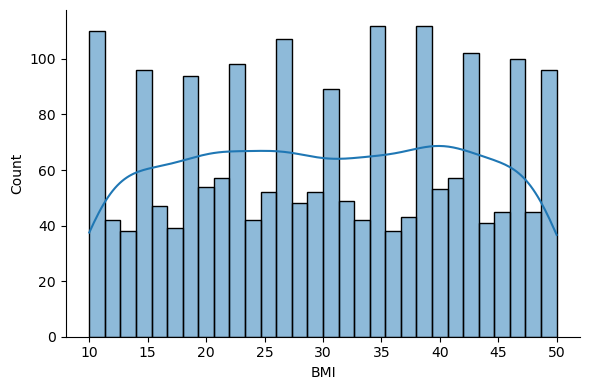

In [99]:
sns.displot(data=df, x='BMI', bins=30, kde=True, height=4, aspect=1.5)

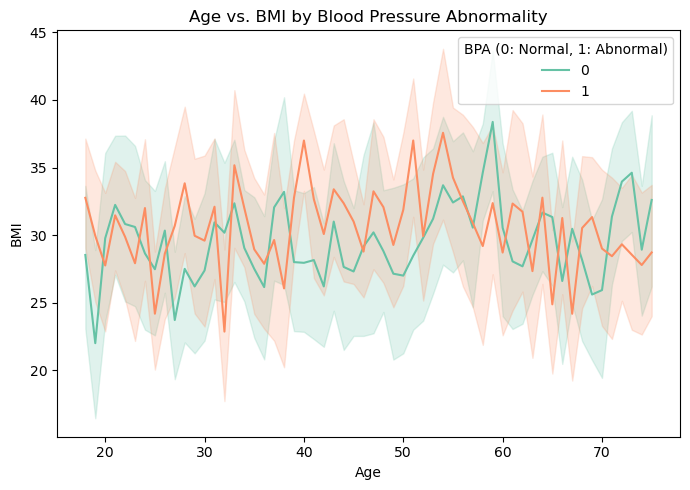

In [103]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df, x='Age', y='BMI', hue='Blood_Pressure_Abnormality', palette='Set2')
plt.title("Age vs. BMI by Blood Pressure Abnormality")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="BPA (0: Normal, 1: Abnormal)")
plt.tight_layout()
plt.show()

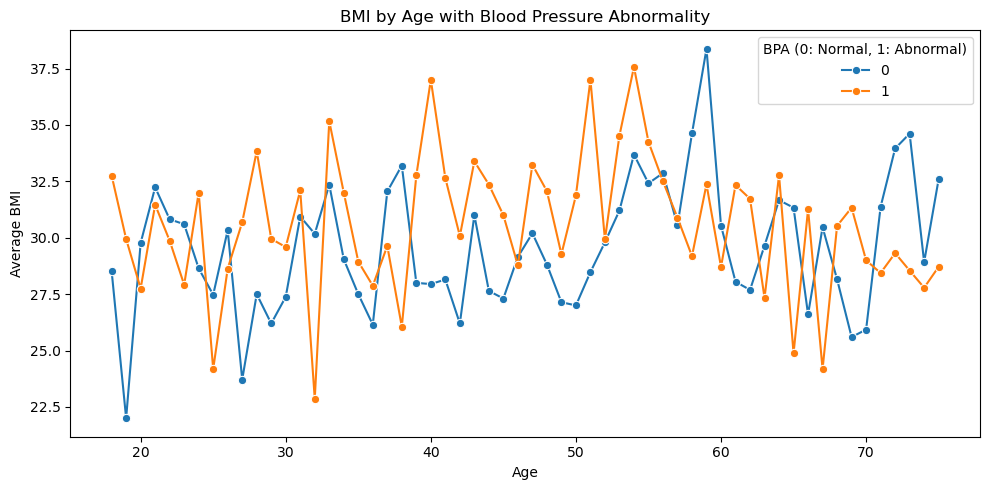

In [109]:
bmi_by_age_bpa = df.groupby(['Age', 'Blood_Pressure_Abnormality'])['BMI'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=bmi_by_age_bpa, x='Age', y='BMI', hue='Blood_Pressure_Abnormality', marker='o')
plt.title("BMI by Age with Blood Pressure Abnormality")
plt.xlabel("Age")
plt.ylabel("Average BMI")
plt.legend(title="BPA (0: Normal, 1: Abnormal)")
plt.tight_layout()
plt.show()

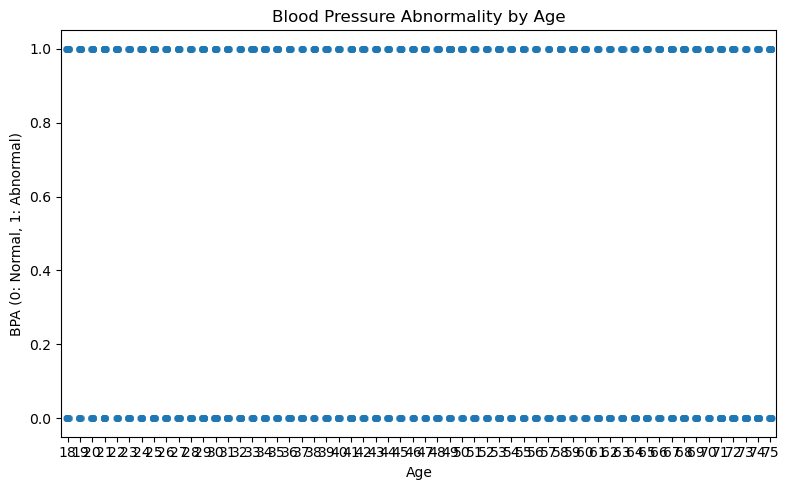

In [105]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='Age', y='Blood_Pressure_Abnormality', jitter=True, alpha=0.5)
plt.title("Blood Pressure Abnormality by Age")
plt.xlabel("Age")
plt.ylabel("BPA (0: Normal, 1: Abnormal)")
plt.tight_layout()
plt.show()

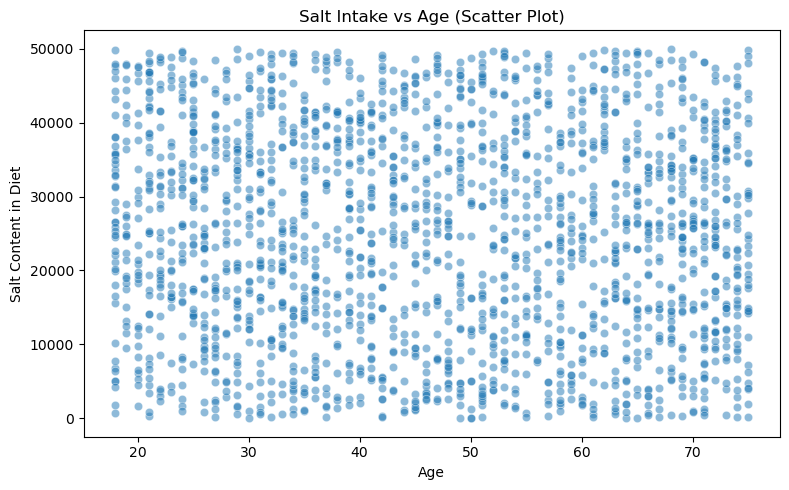

In [111]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='salt_content_in_the_diet', alpha=0.5)
plt.title("Salt Intake vs Age (Scatter Plot)")
plt.xlabel("Age")
plt.ylabel("Salt Content in Diet")
plt.tight_layout()
plt.show()

In [45]:
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [49]:
# 모델 정의
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(14, 2)

    def forward(self, x):
        return self.fc(x)

model = ClassificationModel()

Epoch 1, Loss: 0.7841, Test Accuracy: 51.75%
Epoch 2, Loss: 0.7821, Test Accuracy: 51.75%
Epoch 3, Loss: 0.7800, Test Accuracy: 51.75%
Epoch 4, Loss: 0.7780, Test Accuracy: 51.75%
Epoch 5, Loss: 0.7760, Test Accuracy: 51.75%
Epoch 6, Loss: 0.7740, Test Accuracy: 51.50%
Epoch 7, Loss: 0.7720, Test Accuracy: 51.50%
Epoch 8, Loss: 0.7700, Test Accuracy: 51.25%
Epoch 9, Loss: 0.7680, Test Accuracy: 51.50%
Epoch 10, Loss: 0.7661, Test Accuracy: 51.75%


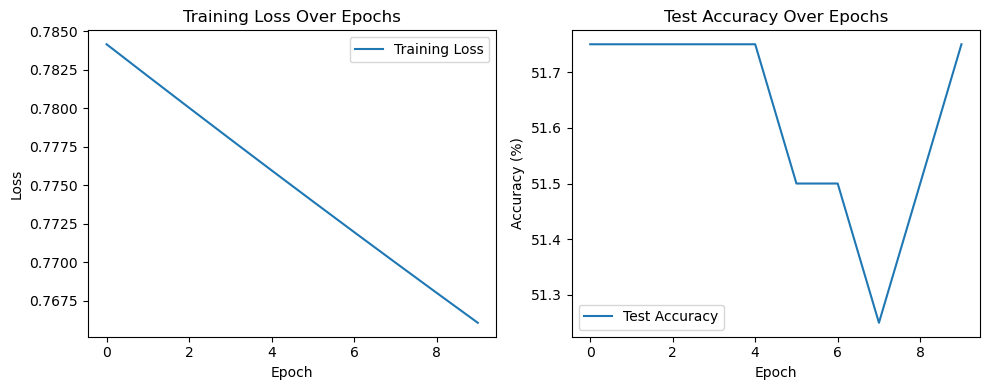

In [53]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 손실함수, 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 기록용 리스트
train_losses = []
test_accuracies = []

# 학습
for epoch in range(10):
    # 모델 학습
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # 테스트 정확도 계산
    with torch.no_grad():
        preds = model(X_test)
        preds_class = torch.argmax(preds, dim=1)
        acc = (preds_class == y_test).float().mean() * 100  # 퍼센트로 변환
        test_accuracies.append(acc.item())

    # 에폭별 결과 출력
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Accuracy: {acc:.2f}%")

# 📈 Loss & Accuracy 같이 시각화
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50, Loss: 0.7092, Test Accuracy: 47.00%
Epoch 5/50, Loss: 0.6551, Test Accuracy: 67.75%
Epoch 10/50, Loss: 0.6069, Test Accuracy: 73.75%
Epoch 15/50, Loss: 0.5635, Test Accuracy: 74.50%
Epoch 20/50, Loss: 0.5297, Test Accuracy: 74.50%
Epoch 25/50, Loss: 0.5065, Test Accuracy: 74.75%
Epoch 30/50, Loss: 0.4911, Test Accuracy: 75.00%
Epoch 35/50, Loss: 0.4777, Test Accuracy: 75.25%
Epoch 40/50, Loss: 0.4622, Test Accuracy: 76.00%
Epoch 45/50, Loss: 0.4443, Test Accuracy: 77.75%
Epoch 50/50, Loss: 0.4255, Test Accuracy: 79.25%


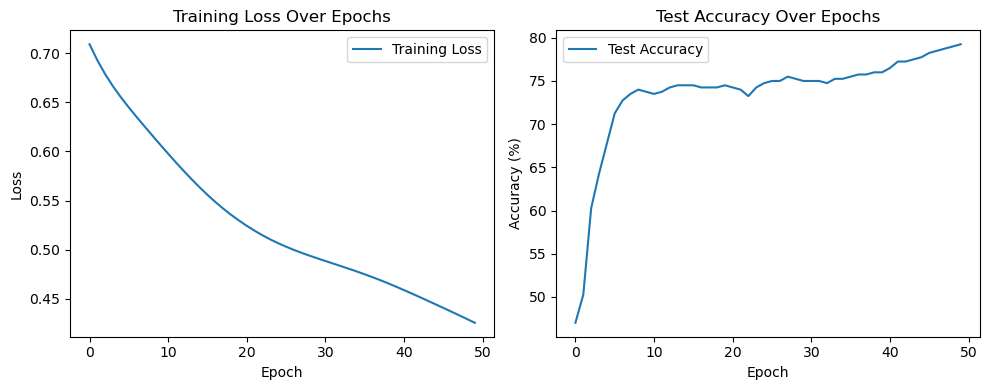

In [68]:
# 📦 개선된 모델
class BetterModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(14, 32)  # 은닉층 추가
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BetterModel()

# 📦 손실함수, 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # 학습률도 살짝 올림

# 📦 학습 기록용 리스트
train_losses = []
test_accuracies = []

# 📦 학습
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # 📦 테스트 정확도 계산
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        preds = test_outputs.argmax(1)
        acc = (preds == y_test).float().mean() * 100  # 퍼센트로 변환
        test_accuracies.append(acc.item())

    # 📢 에폭별 출력
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Test Accuracy: {acc:.2f}%")

# 📈 Loss & Accuracy 같이 시각화
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()